# Filter the audio noise with noisereduce

* [Noise reduction using spectral gating in python
Posted on Sat 07 July 2018 ](https://timsainburg.com/noise-reduction-python.html)
* [noisereduce](https://github.com/timsainb/noisereduce)

> ### Noise reduction in python using spectral gating  
> Noisereduce is a noise reduction algorithm in python that reduces noise in time-domain signals like speech, bioacoustics, and physiological signals. It relies on a method called "spectral gating" which is a form of Noise Gate. It works by computing a spectrogram of a signal (and optionally a noise signal) and estimating a noise threshold (or gate) for each frequency band of that signal/noise. That threshold is used to compute a mask, which gates noise below the frequency-varying threshold.

* [Toward a Computational Neuroethology of Vocal Communication: From Bioacoustics to Neurophysiology, Emerging Tools and Future Directions](https://www.frontiersin.org/journals/behavioral-neuroscience/articles/10.3389/fnbeh.2021.811737/full)

> This review describes emerging techniques that can be applied to acoustic and vocal communication signals with the goal of enabling study beyond a small number of model species. We review a range of modern computational methods for bioacoustics, signal processing, and brain-behavior mapping. Along with a discussion of recent advances and techniques, we include challenges and broader goals in establishing a framework for the computational neuroethology of vocal communication.

In [1]:
import urllib.request
import io
from IPython.display import (
    Audio, 
    display
)
import librosa
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import noisereduce as nr
from noisereduce.generate_noise import band_limited_noise

In [2]:
# Do not resample at the beginning, but at after all the filterings have been done.
INITIAL_RESAMPLE_RATE = None

# Data

In [3]:
data, original_sampling_rate = librosa.load("./data/jfk.flac", sr=INITIAL_RESAMPLE_RATE)
sampling_rate = original_sampling_rate
N = num_total_samples = data.shape[0]

print(f"sampling_rate:[{sampling_rate}], duration:[{data.shape[0] / sampling_rate}] seconds") 
display(Audio(data=data, rate=sampling_rate))

sampling_rate:[44100], duration:[11.0] seconds


# Sound Wave


# Audio Wave (Time Series)

Amplitude of the signal on the y-axis and time along the x-axis

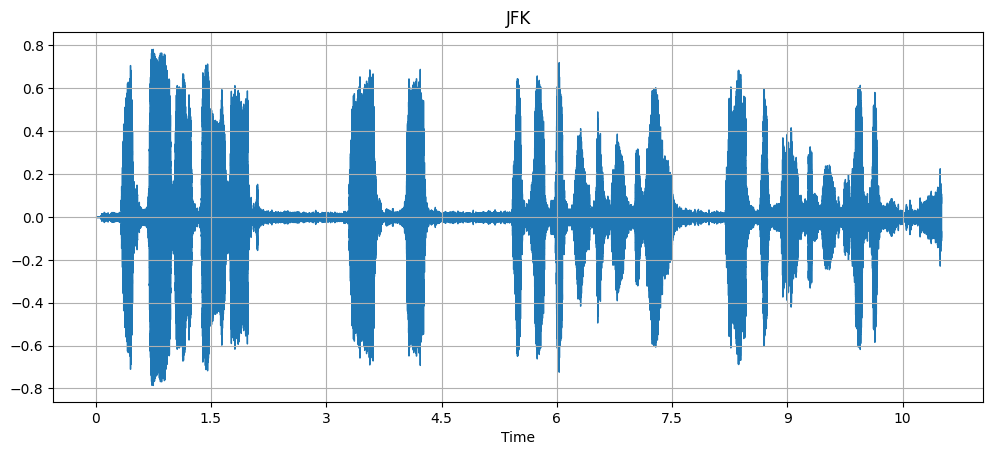

In [4]:
plt.figure().set_figwidth(12)
plt.title("JFK")
plt.grid()
librosa.display.waveshow(y=data, sr=sampling_rate)

# Frequency Spectrum

The frequency values are on the x-axis, usually plotted on a logarithmic scale, while their amplitudes are on the y-axis.

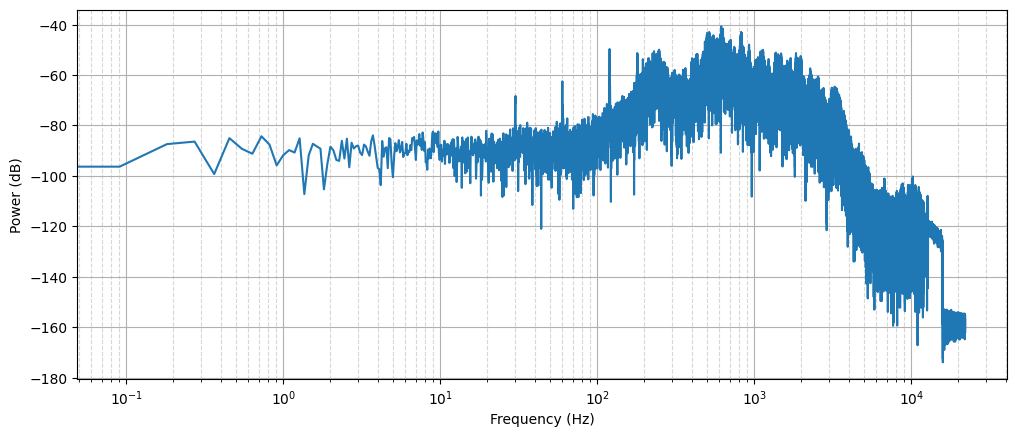

In [5]:
# dft_input = data[:sampling_rate]  # First 1 second
dft = np.fft.rfft(data, norm="forward")
amplitude = 2 * np.abs(dft)
db = 20 * np.log10(amplitude)

# To be compatibe with librosa
# amin=1e-10
# db: np.ndarray = 10.0 * np.log10(np.maximum(amin, amplitude**2))
# db -= 10.0 * np.log10(np.maximum(amin, 1.0))

# get the frequency bins
# frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))
frequency = np.fft.rfftfreq(n=len(data), d=1/sampling_rate)

plt.figure().set_figwidth(12)
plt.plot(frequency, db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (dB)")
plt.grid(visible=True, which='major')
plt.grid(visible=True, which='minor', linestyle='--', alpha=0.5)
plt.xscale("log")

## melspectrogram

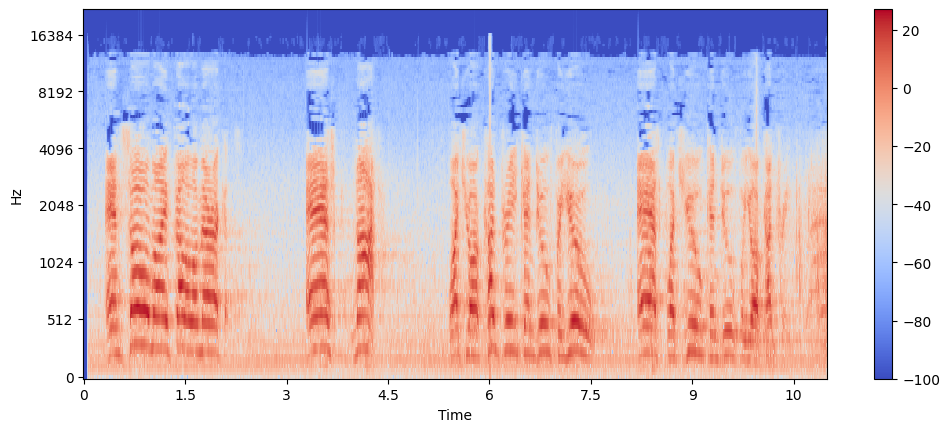

In [6]:
S = librosa.feature.melspectrogram(
    y=data, sr=sampling_rate, n_mels=128, fmax=sampling_rate/2, n_fft=1024, hop_length=512
)
S_dB = librosa.power_to_db(S, ref=1, top_db=None, amin=1e-10)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=sampling_rate/2)
plt.colorbar()

---

# noisereduce

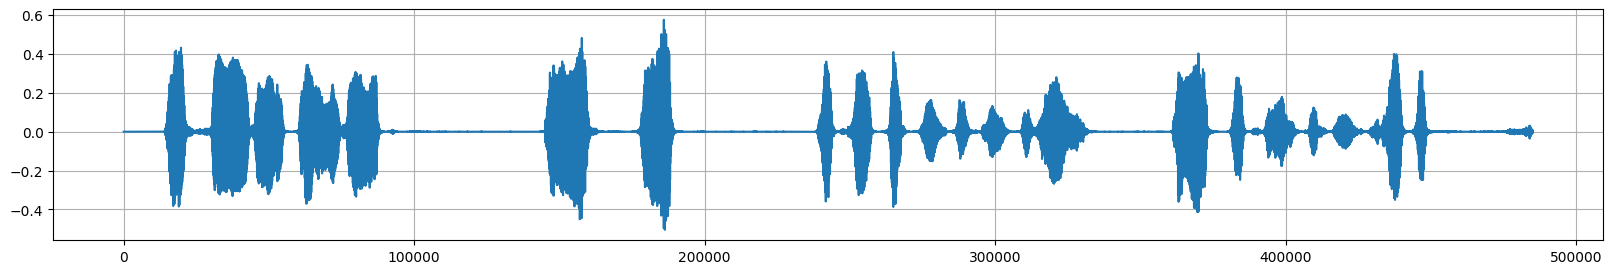

In [7]:
reduced = nr.reduce_noise(
    y = data, 
    sr=sampling_rate, 
    n_std_thresh_stationary=1.5,
    stationary=True,
    use_torch=True
)

fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced)
ax.grid()

display(Audio(data=reduced, rate=sampling_rate))

In [8]:
len(frequency)

242551

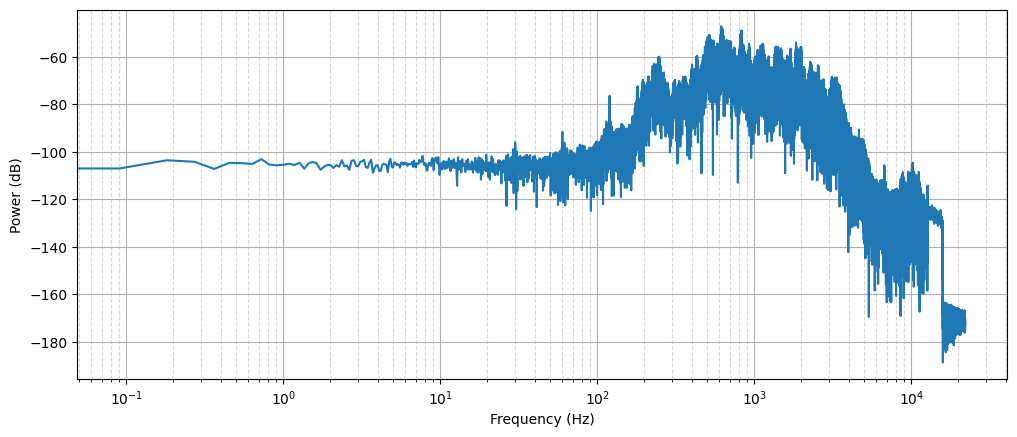

In [10]:
# dft_input = data[:sampling_rate]  # First 1 second
dft_reduced = np.fft.rfft(reduced, norm="forward")
amplitude_reduced = 2 * np.abs(dft_reduced)
db_reduced = 20 * np.log10(amplitude_reduced)

# To be compatibe with librosa
# amin=1e-10
# db: np.ndarray = 10.0 * np.log10(np.maximum(amin, amplitude**2))
# db -= 10.0 * np.log10(np.maximum(amin, 1.0))

# get the frequency bins
# frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))
frequency = np.fft.rfftfreq(n=len(reduced), d=1/sampling_rate)

plt.figure().set_figwidth(12)
plt.plot(frequency, db_reduced)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (dB)")
plt.grid(visible=True, which='major')
plt.grid(visible=True, which='minor', linestyle='--', alpha=0.5)
plt.xscale("log")

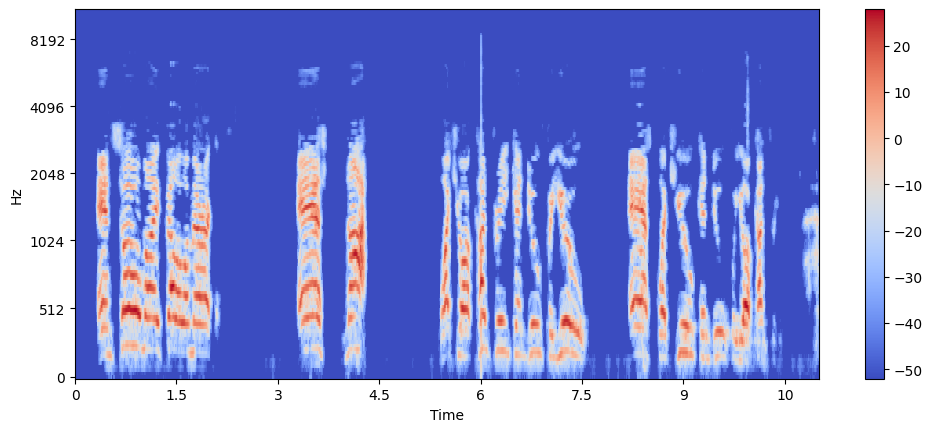

In [12]:
S = librosa.feature.melspectrogram(y=reduced, sr=sampling_rate, n_mels=128, fmax=sampling_rate/2)
S_dB = librosa.power_to_db(S)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=sampling_rate/4)
plt.colorbar()